In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
df = pd.read_csv('cars24-car-price-cleaned.csv')

In [3]:
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0


In [4]:
df.shape

(19820, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19820 entries, 0 to 19819
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   selling_price     19820 non-null  float64
 1   year              19820 non-null  float64
 2   km_driven         19820 non-null  int64  
 3   mileage           19820 non-null  float64
 4   engine            19820 non-null  float64
 5   max_power         19820 non-null  float64
 6   age               19820 non-null  float64
 7   make              19820 non-null  object 
 8   model             19820 non-null  object 
 9   Individual        19820 non-null  int64  
 10  Trustmark Dealer  19820 non-null  int64  
 11  Diesel            19820 non-null  int64  
 12  Electric          19820 non-null  int64  
 13  LPG               19820 non-null  int64  
 14  Petrol            19820 non-null  int64  
 15  Manual            19820 non-null  int64  
 16  5                 19820 non-null  int64 

In [6]:
df.columns

Index(['selling_price', 'year', 'km_driven', 'mileage', 'engine', 'max_power',
       'age', 'make', 'model', 'Individual', 'Trustmark Dealer', 'Diesel',
       'Electric', 'LPG', 'Petrol', 'Manual', '5', '>5'],
      dtype='object')

In [7]:
df.rename(columns={'5':'5Years','>5':'5_MoreYears'}, inplace=True)

In [8]:
df.columns

Index(['selling_price', 'year', 'km_driven', 'mileage', 'engine', 'max_power',
       'age', 'make', 'model', 'Individual', 'Trustmark Dealer', 'Diesel',
       'Electric', 'LPG', 'Petrol', 'Manual', '5Years', '5_MoreYears'],
      dtype='object')

In [9]:
df[:4]

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5Years,5_MoreYears
0,1.20,2012.0,120000,19.70,796.0,46.3,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.0,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.0,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.1,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0


In [10]:
df['year'].nunique()

27

In [11]:
df['year'].min(), df['year'].max()

(1992.0, 2021.0)

In [12]:
df['age'].min(), df['age'].max()

(2.0, 31.0)

In [13]:
df[df['age'] == 31.0]

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5Years,5_MoreYears
3354,0.6,1992.0,22612,22.05,796.0,47.3,31.0,MARUTI,ALTO 800 STD,0,0,0,0,0,1,1,1,0


In [14]:
df['make'].nunique()

41

In [15]:
df['model'].nunique()

3233

In [16]:
df.isna().sum()

selling_price       0
year                0
km_driven           0
mileage             0
engine              0
max_power           0
age                 0
make                0
model               0
Individual          0
Trustmark Dealer    0
Diesel              0
Electric            0
LPG                 0
Petrol              0
Manual              0
5Years              0
5_MoreYears         0
dtype: int64

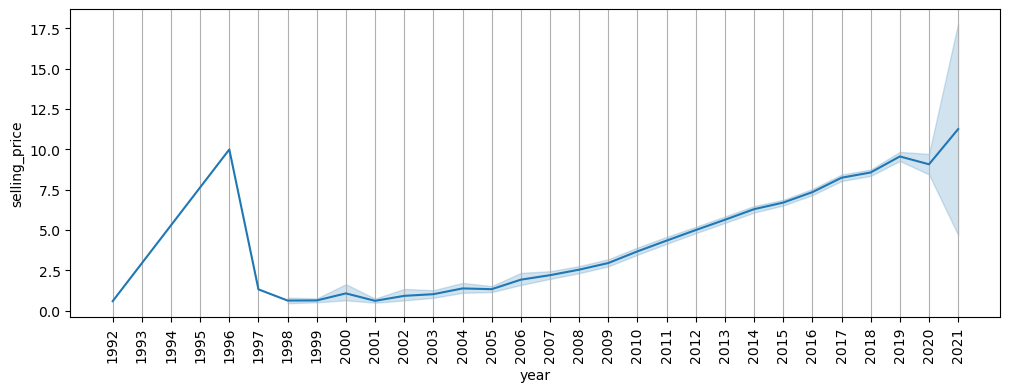

In [17]:
plt.figure(figsize=(12,4))
sns.lineplot(data=df, x='year', y='selling_price')
plt.xticks(np.arange(1992,2022))
plt.xticks(rotation = 90)
plt.grid(axis='x')
plt.show()

In [18]:
df['km_driven'].min(), df['km_driven'].max()

(100, 3800000)

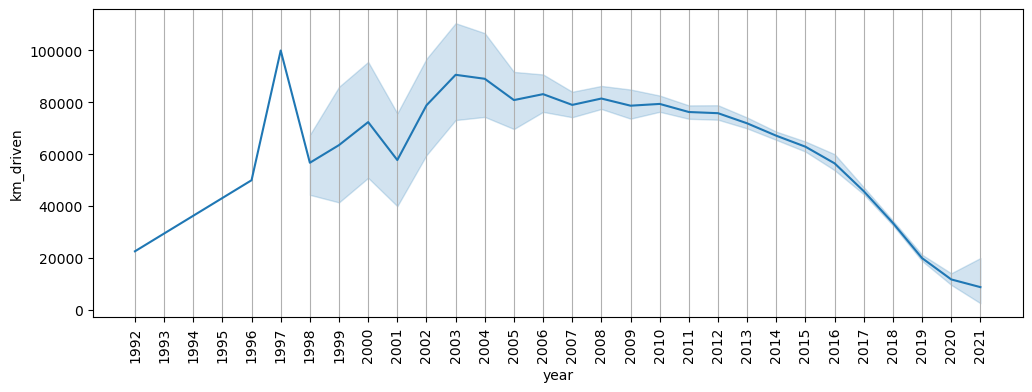

In [19]:
plt.figure(figsize=(12,4))
sns.lineplot(data=df, x='year', y='km_driven')
plt.xticks(np.arange(1992,2022))
plt.xticks(rotation = 90)
plt.grid(axis='x')
plt.show()

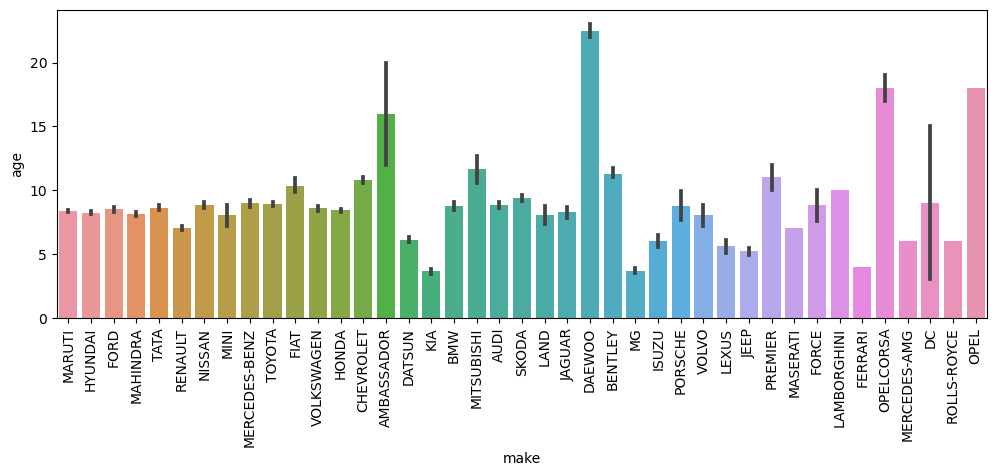

In [20]:
plt.figure(figsize=(12,4))
sns.barplot(data=df, x='make', y='age')
plt.xticks(rotation = 90)
plt.savefig('cars_age.png')
plt.show()

In [21]:
df.groupby(by='make')['selling_price'].sum()

make
AMBASSADOR           5.81000
AUDI              5565.53750
BENTLEY             83.61000
BMW               8379.57500
CHEVROLET         1105.79000
DAEWOO               1.56000
DATSUN             544.88000
DC                  23.85000
FERRARI             20.90250
FIAT               356.26585
FORCE               27.60000
FORD              5272.43250
HONDA            10638.24500
HYUNDAI          19444.31500
ISUZU              168.45250
JAGUAR            1615.00000
JEEP               666.73750
KIA                519.14000
LAMBORGHINI         20.90250
LAND              1048.56750
LEXUS              209.02500
MAHINDRA          9334.47750
MARUTI           26468.67625
MASERATI            41.80500
MERCEDES-AMG        20.90250
MERCEDES-BENZ     8279.66750
MG                 333.06000
MINI               426.17750
MITSUBISHI         336.61000
NISSAN            1332.83250
OPEL                 1.50000
OPELCORSA            4.55000
PORSCHE            521.66000
PREMIER              5.10000
RENAULT  

In [22]:
ambassdor = df[df['make'] == 'AMBASSADOR']
ambassdor

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5Years,5_MoreYears
52,2.25,2010.0,86000,12.2,1817.0,75.0,13.0,AMBASSADOR,AVIGO 1800 ISZ MPFI AC,0,0,0,0,0,1,1,1,0
285,1.16,2005.0,120000,13.2,1995.0,56.0,18.0,AMBASSADOR,AVIGO 2000 DSZ,1,0,1,0,0,0,1,1,0
2955,0.90,2001.0,10000,12.8,1817.0,75.0,22.0,AMBASSADOR,CLASSIC 1800 ISZ MPFI AC PS,1,0,0,0,0,1,1,1,0
9044,1.50,2012.0,100000,12.8,1995.0,52.0,11.0,AMBASSADOR,CLASSIC 2000 DSZ,1,0,1,0,0,0,1,1,0


In [23]:
ambassdor['selling_price'].sum().round(2)

5.81

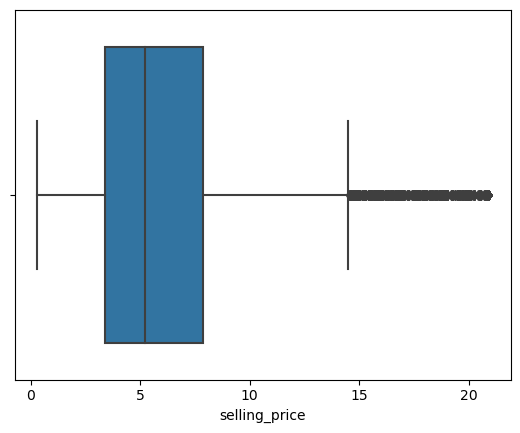

In [24]:
sns.boxplot(data=df, x='selling_price')
plt.show()

In [25]:
df_num =  df.iloc[:, :7]
df_num

,selling_price,year,km_driven,mileage,engine,max_power,age
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0
...,...,...,...,...,...,...,...
19815,6.50,2017.0,69480,23.59,1364.0,67.05,6.0
19816,9.25,2019.0,18000,17.50,1373.0,91.10,4.0
19817,4.25,2015.0,67000,21.14,1498.0,103.52,8.0
19818,12.25,2016.0,3800000,16.00,2179.0,140.00,7.0


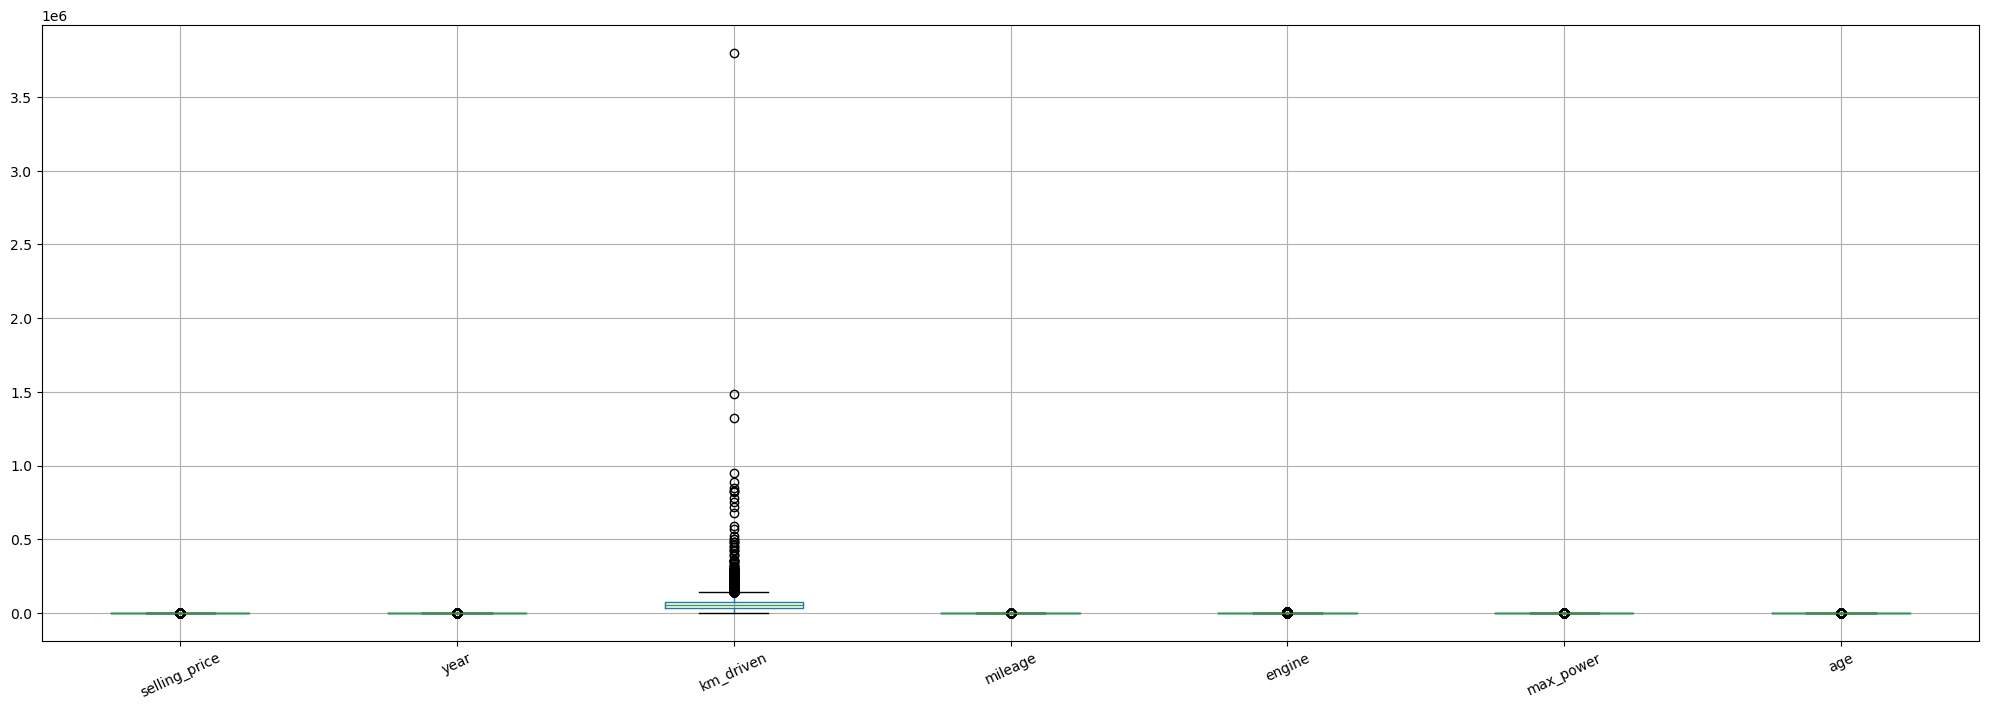

In [26]:
df_num.boxplot(rot=25, figsize=(25,8))
plt.show()

In [27]:
df[:5]

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5Years,5_MoreYears
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0


In [28]:
df['make'] = df.groupby(by='make')['selling_price'].transform("mean")
df[:2]

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5Years,5_MoreYears
0,1.2,2012.0,120000,19.7,796.0,46.3,11.0,4.684721,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.5,2016.0,20000,18.9,1197.0,82.0,7.0,5.458819,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0


In [29]:
df['model'] = df.groupby(by='model')['selling_price'].transform('mean')
df[:3]

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5Years,5_MoreYears
0,1.20,2012.0,120000,19.7,796.0,46.3,11.0,4.684721,1.18000,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.9,1197.0,82.0,7.0,5.458819,4.81875,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.0,1197.0,80.0,13.0,5.458819,3.39400,1,0,0,0,0,1,1,1,0


In [30]:
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5Years,5_MoreYears
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,4.684721,1.180000,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,5.458819,4.818750,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,5.458819,3.394000,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,4.684721,2.242676,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,5.858258,6.777576,0,0,1,0,0,0,1,1,0


In [31]:
y = df['selling_price']
y.head()

0    1.20
1    5.50
2    2.15
3    2.26
4    5.70
Name: selling_price, dtype: float64

In [32]:
X = df.iloc[:, 1::]
X.head()

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5Years,5_MoreYears
0,2012.0,120000,19.70,796.0,46.30,11.0,4.684721,1.180000,1,0,0,0,0,1,1,1,0
1,2016.0,20000,18.90,1197.0,82.00,7.0,5.458819,4.818750,1,0,0,0,0,1,1,1,0
2,2010.0,60000,17.00,1197.0,80.00,13.0,5.458819,3.394000,1,0,0,0,0,1,1,1,0
3,2012.0,37000,20.92,998.0,67.10,11.0,4.684721,2.242676,1,0,0,0,0,1,1,1,0
4,2015.0,30000,22.77,1498.0,98.59,8.0,5.858258,6.777576,0,0,1,0,0,0,1,1,0


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
X_train.shape

(15856, 17)

In [35]:
y_train.shape

(15856,)

In [36]:
X_test.shape

(3964, 17)

In [37]:
y_test.shape

(3964,)

In [38]:
scaling = MinMaxScaler()
scaling

MinMaxScaler()

In [39]:
X_train = pd.DataFrame(scaling.fit_transform(X_train), columns=X_train.columns)
X_train.head()

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5Years,5_MoreYears
0,0.724138,0.053808,0.142586,0.236671,0.158776,0.275862,0.236566,0.167659,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.620690,0.065625,0.104052,0.295468,0.283414,0.379310,0.823407,0.515065,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.896552,0.049768,0.201638,0.184834,0.111111,0.103448,0.194048,0.318691,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.931034,0.010034,0.171034,0.177577,0.127214,0.068966,0.178964,0.256955,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.551724,0.074012,0.081897,0.266440,0.201288,0.448276,0.258412,0.122249,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0


In [40]:
X_test = pd.DataFrame(scaling.fit_transform(X_test), columns=X_test.columns)
X_test.head()

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5Years,5_MoreYears
0,0.826087,0.020795,0.147104,0.219620,0.143011,0.173913,0.190168,0.197188,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.739130,0.015925,0.132625,0.225247,0.150179,0.260870,0.236566,0.225896,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.782609,0.018531,0.201737,0.225247,0.167742,0.217391,0.258412,0.254237,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.782609,0.007742,0.118726,0.179772,0.150000,0.217391,0.258412,0.261147,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.608696,0.015530,0.140154,0.149202,0.111290,0.391304,0.194048,0.089876,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0


In [41]:
Model = LinearRegression()
Model

LinearRegression()

In [42]:
Model.fit(X_train, y_train)

LinearRegression()

In [43]:
Model.coef_

array([ 1.42644510e+13, -4.66328552e+00, -5.13218840e+00,  1.78085483e+00,
        6.78375438e-01,  1.42644510e+13,  1.39673516e+00,  1.76702137e+01,
       -1.20863223e-01, -1.65170354e-01,  1.20628385e-01,  2.55604059e+00,
        3.08631424e-01, -2.07329821e-01, -8.85983709e-02, -2.54707230e-01,
       -4.21219403e-01])

In [44]:
Model.intercept_

-14264450963593.582

In [45]:
Model.score(X_train, y_train)

0.9455031464136608

In [46]:
Model.score(X_test, y_test)

0.9472497545017382

In [47]:
# lets Predict for some data

In [48]:
y_train[:10]

5662     5.25
4556     8.25
7094     7.50
1441     5.70
17079    4.00
8687     7.50
16301    4.85
19537    6.35
10004    0.90
5248     2.75
Name: selling_price, dtype: float64

In [49]:
Model.predict(X_train)[:10]

array([ 3.77539062, 10.83007812,  6.9921875 ,  5.97265625,  2.16601562,
        7.40625   ,  4.97460938,  5.9375    , -0.7734375 ,  2.26171875])

In [50]:
y_test[:10]

960       7.00
4073      4.75
4339      6.30
19325     5.25
438       2.10
13078    12.00
5760      2.48
9792      3.50
3585      5.00
1147      1.25
Name: selling_price, dtype: float64

In [51]:
y_test = y_test.values

In [52]:
y_test = y_test.reshape(-1,1)
y_test.shape

(3964, 1)

In [53]:
y_test[:10]

array([[ 7.  ],
       [ 4.75],
       [ 6.3 ],
       [ 5.25],
       [ 2.1 ],
       [12.  ],
       [ 2.48],
       [ 3.5 ],
       [ 5.  ],
       [ 1.25]])

In [54]:
Model.predict(X_test)

array([5.0546875 , 5.29492188, 5.65234375, ..., 0.45703125, 2.3671875 ,
       6.98046875])

# Lets check for the Adjusted R score

In [81]:
Model.score(X_test, y_test)

0.9472497545017382

In [80]:
#this is r2 score
r2 = Model.score(X_train, y_train)
r2

0.9455031464136608

In [82]:
X_train.shape

(15856, 17)

In [84]:
n, d = X_train.shape

In [85]:
print(n)
print(d)

15856
17


In [90]:
Numerator = ((1-r2)*(n-1))
Numerator

864.0476136114073

In [91]:
Denominator = (n-d-1)
Denominator

15838

In [92]:
Adjusted_r2 = 1- (Numerator/Denominator)
Adjusted_r2

0.9454446512431237

# Stats

In [59]:
x_sm = sm.add_constant(X_train)
x_sm

,const,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5Years,5_MoreYears
0,1.0,0.724138,0.053808,0.142586,0.236671,0.158776,0.275862,0.236566,0.167659,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.0,0.620690,0.065625,0.104052,0.295468,0.283414,0.379310,0.823407,0.515065,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.896552,0.049768,0.201638,0.184834,0.111111,0.103448,0.194048,0.318691,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.931034,0.010034,0.171034,0.177577,0.127214,0.068966,0.178964,0.256955,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,1.0,0.551724,0.074012,0.081897,0.266440,0.201288,0.448276,0.258412,0.122249,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15851,1.0,0.793103,0.021483,0.161552,0.117891,0.068116,0.206897,0.194048,0.112800,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
15852,1.0,0.896552,0.002589,0.142328,0.147808,0.099839,0.103448,0.194048,0.191210,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
15853,1.0,0.758621,0.068578,0.131897,0.184834,0.110950,0.241379,0.194048,0.192868,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
15854,1.0,0.827586,0.047298,0.118966,0.221712,0.180837,0.172414,0.258412,0.356532,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0


In [66]:
x_sm.shape

(15856, 18)

In [70]:
y_train = y_train.values
y_train

array([5.25, 8.25, 7.5 , ..., 5.3 , 7.  , 6.  ])

In [73]:
y_train = y_train.reshape(-1,1)

In [74]:
y_train.shape

(15856, 1)

In [77]:
model= sm.OLS(y_train, x_sm)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.717e+04
Date:                Tue, 30 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:32:06   Log-Likelihood:                -24403.
No. Observations:               15856   AIC:                         4.884e+04
Df Residuals:                   15839   BIC:                         4.897e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.449e+13   2.31e+12  